# adjugate

A package for calculating submatricies, minors, adjugate- and cofactor matricies.

In [1]:
import numpy as np
from adjugate import adj

M = np.random.rand(4, 4)
adjM = adj(M)
M, adjM

(array([[0.46445212, 0.90776864, 0.5617845 , 0.46365445],
        [0.23096052, 0.37817574, 0.19684724, 0.26416446],
        [0.8157284 , 0.35109541, 0.29357478, 0.63978973],
        [0.97616731, 0.71221494, 0.18073805, 0.7949908 ]]),
 array([[ 0.04081465, -0.13855441,  0.00220198,  0.0204637 ],
        [ 0.01427584, -0.02328107, -0.02248499,  0.01750541],
        [ 0.01310092, -0.00671938,  0.02476545, -0.02533861],
        [-0.06588407,  0.19251526,  0.01180968, -0.02407058]]))

## Installation

In [2]:
pip install adjugate

Note: you may need to restart the kernel to use updated packages.


## Usage

This package provides four functions:

### submatrix

`submatrix(M, i, j)`

Removes the `i`-th row and `j`-th column of `M`. Multiple indices or slices can be provided.

In [3]:
from adjugate import submatrix

M = np.arange(16).reshape(4, 4)
M, submatrix(M, 1, 2)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[ 0,  1,  3],
        [ 8,  9, 11],
        [12, 13, 15]]))

### minor

`minor(M, i, j)`

Calculates the (`i`, `j`) minor of `M`.

In [4]:
from adjugate import minor

M = np.random.rand(4, 4)
minor(M, 1, 2)

-0.2140487789380897

### adj

`adj(M)`

Calculates the adjugate of `M`.

In [5]:
M, adj(M)

(array([[0.08665864, 0.99394655, 0.12535963, 0.26405097],
        [0.5579125 , 0.86322768, 0.89414941, 0.568058  ],
        [0.67013036, 0.84454395, 0.47131153, 0.19339756],
        [0.66467323, 0.85295762, 0.13306573, 0.5569822 ]]),
 array([[-0.23323852, -0.12057808,  0.24929258,  0.14698786],
        [ 0.21400119, -0.06933021,  0.09234215, -0.06280701],
        [-0.03500821,  0.21404878,  0.04025053, -0.21568468],
        [-0.04102134,  0.19892593, -0.44852065,  0.29057721]]))

### cof

`cof(M)`

Calculates the cofactor matrix of `M`.

In [6]:
from adjugate import cof

M, cof(M)

(array([[0.08665864, 0.99394655, 0.12535963, 0.26405097],
        [0.5579125 , 0.86322768, 0.89414941, 0.568058  ],
        [0.67013036, 0.84454395, 0.47131153, 0.19339756],
        [0.66467323, 0.85295762, 0.13306573, 0.5569822 ]]),
 array([[-0.23323852,  0.21400119, -0.03500821, -0.04102134],
        [-0.12057808, -0.06933021,  0.21404878,  0.19892593],
        [ 0.24929258,  0.09234215,  0.04025053, -0.44852065],
        [ 0.14698786, -0.06280701, -0.21568468,  0.29057721]]))

## Speed

If you know that you matrix is invertible, then `np.linalg.det(M) * np.linalg.inv(M)` might be a faster choice (O(3) instad of O(5)). But this is in general, especially as the determinant approaches zero, not possible or precise:

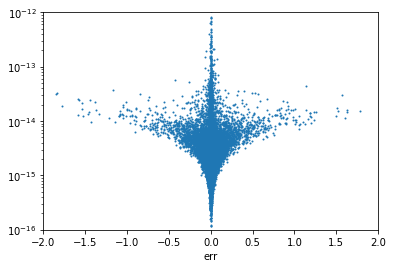

In [7]:
import matplotlib.pyplot as plt

N = 20
dets, errs = [], []
for _ in range(10000):
    M = np.random.rand(N, N)
    dets += [np.linalg.det(M)]
    errs += [np.linalg.norm(adj(M)-np.linalg.det(M)*np.linalg.inv(M))]

fig, ax = plt.subplots()
ax.scatter(dets, errs, marker='o', s=(72./fig.dpi)**2)
ax.set_yscale('log')
ax.set_xlim(-2, +2)
ax.set_ylim(1e-16, 1e-12)
ax.set_xlabel('det')
ax.set_xlabel('err')
plt.show()